In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready for Simple Linear Regression Analysis")

✅ Libraries imported successfully!
📊 Ready for Simple Linear Regression Analysis


In [4]:

# Load the dataset
df = pd.read_csv('../Datasets/Cleaned_Preprocessed/mgnrega_data_fully_cleaned.csv')

print("📋 Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print("\n🔍 First few rows:")
print(df.head())

print("\n📈 Key Variables for Analysis:")
key_variables = ['Total_Exp', 'Total_No_of_Workers', 'Average_Wage_rate_per_day_per_person', 
                'Total_Households_Worked', 'Wages', 'Persondays_of_Central_Liability_so_far']
print(df[key_variables].describe())


📋 Dataset Information:
Shape: (302752, 36)
Columns: 36

🔍 First few rows:
    fin_year month  state_code              State  district_code  \
0  2019-2020  June          35        UTTARAKHAND           3506   
1  2019-2020  June          35        UTTARAKHAND           3508   
2  2019-2020  June          35        UTTARAKHAND           3512   
3  2019-2020  June          37             LADAKH           3707   
4  2019-2020   Aug          14  JAMMU AND KASHMIR           1411   

       District  Approved_Labour_Budget  Average_Wage_rate_per_day_per_person  \
0  RUDRA PRAYAG                323294.0                            181.735337   
1      NAINITAL                252505.0                            177.663900   
2     BAGESHWAR                241752.0                            171.565915   
3  LEH (LADAKH)                     0.0                           5000.000000   
4        POONCH                640000.0                            350.059928   

   Average_days_of_employment_

In [5]:

X = df[['Total_No_of_Workers']].copy()
y = df['Total_Exp'].copy()

print("🎯 Variables Selected for Simple Linear Regression:")
print(f"Independent Variable (X): Total_No_of_Workers")
print(f"Dependent Variable (y): Total_Exp")

# Check for missing values
print(f"\n🔍 Missing Values Check:")
print(f"X missing values: {X.isnull().sum().sum()}")
print(f"y missing values: {y.isnull().sum()}")

# Remove rows with missing values
df_clean = df[['Total_No_of_Workers', 'Total_Exp']].dropna()
X_clean = df_clean[['Total_No_of_Workers']]
y_clean = df_clean['Total_Exp']

print(f"\n📊 Clean Dataset Shape: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} rows with missing values")


🎯 Variables Selected for Simple Linear Regression:
Independent Variable (X): Total_No_of_Workers
Dependent Variable (y): Total_Exp

🔍 Missing Values Check:
X missing values: 0
y missing values: 0

📊 Clean Dataset Shape: (302752, 2)
Removed 0 rows with missing values


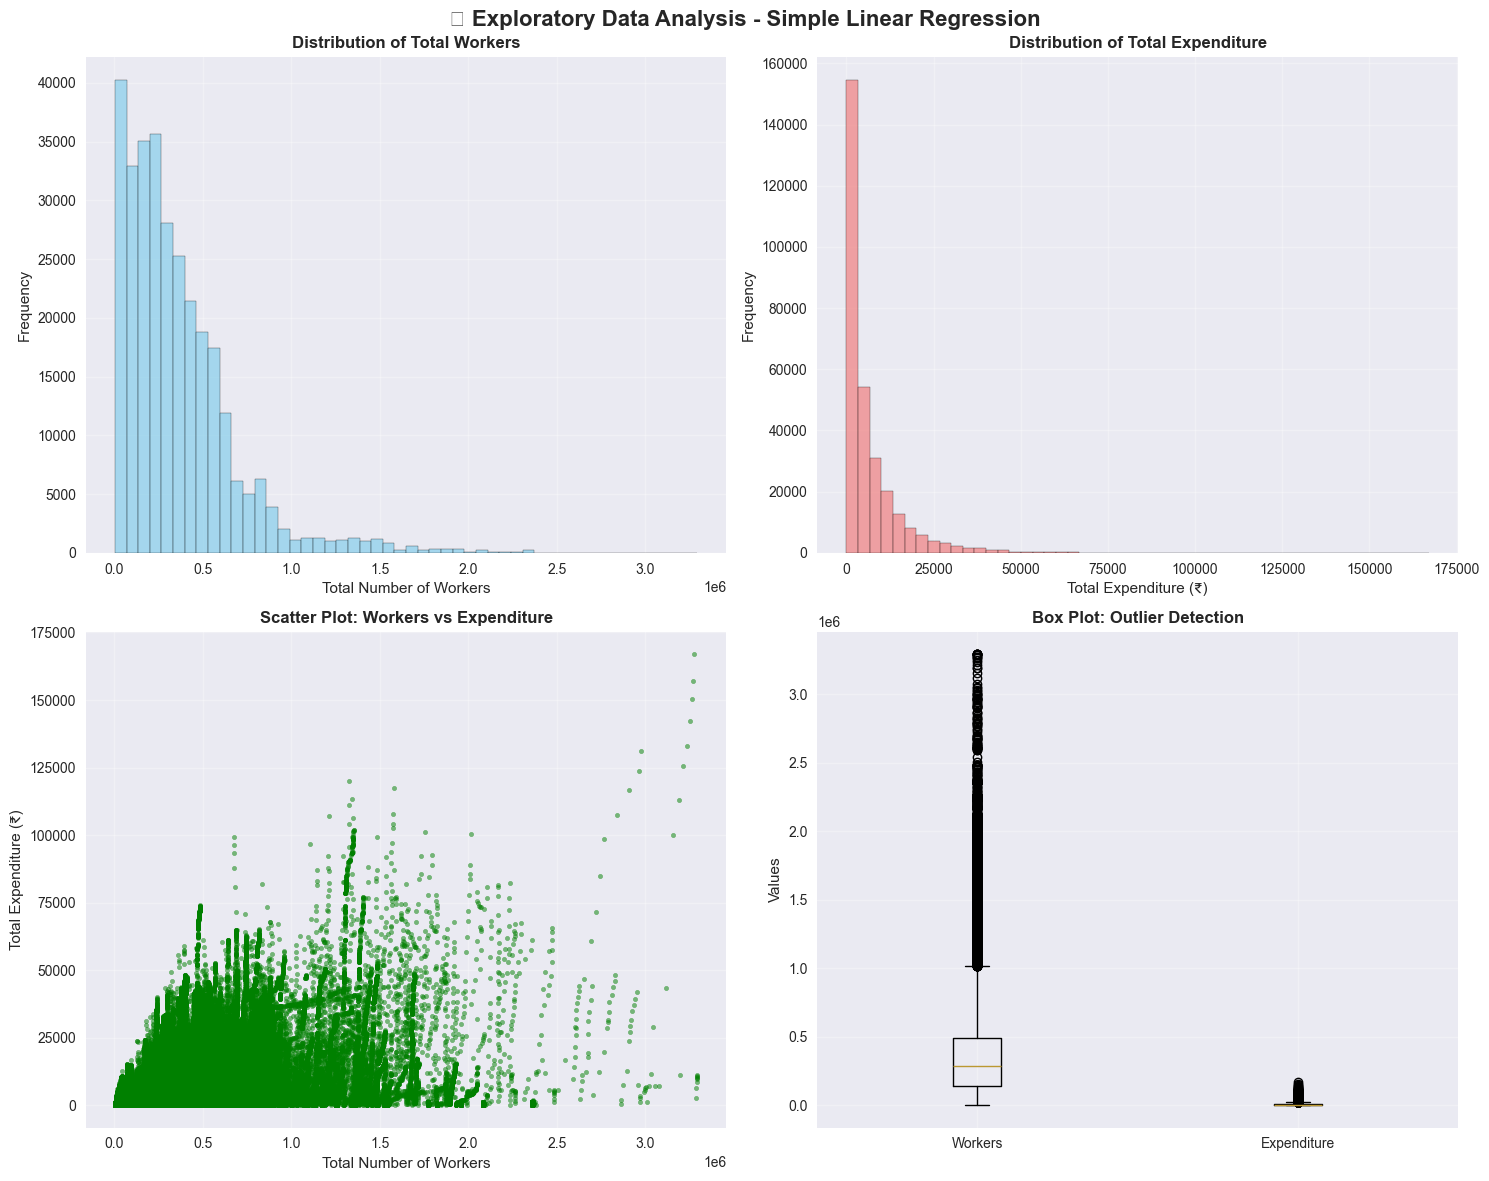


📈 Statistical Summary:
Correlation Coefficient: 0.4292
Mean Workers: 359144.51
Mean Expenditure: 6431.95


In [6]:

# Create comprehensive EDA plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Exploratory Data Analysis - Simple Linear Regression', fontsize=16, fontweight='bold')

# 1. Distribution of Total Workers
axes[0, 0].hist(X_clean['Total_No_of_Workers'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Total Workers', fontweight='bold')
axes[0, 0].set_xlabel('Total Number of Workers')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of Total Expenditure
axes[0, 1].hist(y_clean, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Total Expenditure', fontweight='bold')
axes[0, 1].set_xlabel('Total Expenditure (₹)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter Plot
axes[1, 0].scatter(X_clean['Total_No_of_Workers'], y_clean, alpha=0.5, color='green', s=10)
axes[1, 0].set_title('Scatter Plot: Workers vs Expenditure', fontweight='bold')
axes[1, 0].set_xlabel('Total Number of Workers')
axes[1, 0].set_ylabel('Total Expenditure (₹)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box Plot for Outliers
axes[1, 1].boxplot([X_clean['Total_No_of_Workers'], y_clean], labels=['Workers', 'Expenditure'])
axes[1, 1].set_title('Box Plot: Outlier Detection', fontweight='bold')
axes[1, 1].set_ylabel('Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n📈 Statistical Summary:")
print(f"Correlation Coefficient: {X_clean['Total_No_of_Workers'].corr(y_clean):.4f}")
print(f"Mean Workers: {X_clean['Total_No_of_Workers'].mean():.2f}")
print(f"Mean Expenditure: {y_clean.mean():.2f}")


In [7]:

# Calculate IQR for outlier detection
Q1_workers = X_clean['Total_No_of_Workers'].quantile(0.25)
Q3_workers = X_clean['Total_No_of_Workers'].quantile(0.75)
IQR_workers = Q3_workers - Q1_workers

Q1_exp = y_clean.quantile(0.25)
Q3_exp = y_clean.quantile(0.75)
IQR_exp = Q3_exp - Q1_exp

# Define outlier bounds
lower_bound_workers = Q1_workers - 1.5 * IQR_workers
upper_bound_workers = Q3_workers + 1.5 * IQR_workers
lower_bound_exp = Q1_exp - 1.5 * IQR_exp
upper_bound_exp = Q3_exp + 1.5 * IQR_exp

# Count outliers
outliers_workers = ((X_clean['Total_No_of_Workers'] < lower_bound_workers) | 
                   (X_clean['Total_No_of_Workers'] > upper_bound_workers)).sum()
outliers_exp = ((y_clean < lower_bound_exp) | (y_clean > upper_bound_exp)).sum()

print("🚨 Outlier Analysis:")
print(f"Outliers in Workers: {outliers_workers}")
print(f"Outliers in Expenditure: {outliers_exp}")
print(f"Percentage of outliers in Workers: {(outliers_workers/len(X_clean))*100:.2f}%")
print(f"Percentage of outliers in Expenditure: {(outliers_exp/len(y_clean))*100:.2f}%")

# Remove outliers for better model performance
df_no_outliers = df_clean[
    (df_clean['Total_No_of_Workers'] >= lower_bound_workers) & 
    (df_clean['Total_No_of_Workers'] <= upper_bound_workers) &
    (df_clean['Total_Exp'] >= lower_bound_exp) & 
    (df_clean['Total_Exp'] <= upper_bound_exp)
].copy()

X_final = df_no_outliers[['Total_No_of_Workers']]
y_final = df_no_outliers['Total_Exp']

print(f"\n🧹 After removing outliers:")
print(f"Final dataset shape: {df_no_outliers.shape}")
print(f"Removed {(len(df_clean) - len(df_no_outliers))} outlier records")


🚨 Outlier Analysis:
Outliers in Workers: 12217
Outliers in Expenditure: 22159
Percentage of outliers in Workers: 4.04%
Percentage of outliers in Expenditure: 7.32%

🧹 After removing outliers:
Final dataset shape: (271922, 2)
Removed 30830 outlier records


In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

print("🔄 Train-Test Split:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {(X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100:.1f}%")
print(f"Testing set percentage: {(X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100:.1f}%")


🔄 Train-Test Split:
Training set size: 217537 samples
Testing set size: 54385 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


In [9]:

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get model coefficients
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

print("🎯 Simple Linear Regression Model:")
print(f"Equation: Total_Exp = {intercept:.2f} + {slope:.6f} × Total_Workers")
print(f"Slope (β₁): {slope:.6f}")
print(f"Intercept (β₀): {intercept:.2f}")

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("\n✅ Model trained successfully!")


🎯 Simple Linear Regression Model:
Equation: Total_Exp = 1799.65 + 0.008932 × Total_Workers
Slope (β₁): 0.008932
Intercept (β₀): 1799.65

✅ Model trained successfully!


In [10]:

# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("📊 Model Performance Metrics:")
print("="*50)
print(f"Training Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print()
print(f"Testing Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")

# Interpretation
print("\n🔍 Model Interpretation:")
if test_r2 > 0.7:
    print("✅ Excellent model fit (R² > 0.7)")
elif test_r2 > 0.5:
    print("✅ Good model fit (R² > 0.5)")
elif test_r2 > 0.3:
    print("⚠️ Moderate model fit (R² > 0.3)")
else:
    print("❌ Poor model fit (R² < 0.3)")

print(f"\n📈 The model explains {test_r2*100:.1f}% of the variance in Total Expenditure")
print(f"💰 On average, each additional worker contributes ₹{slope:.2f} to total expenditure")


📊 Model Performance Metrics:
Training Set:
  R² Score: 0.1698
  RMSE: 4281.36
  MAE: 3303.51

Testing Set:
  R² Score: 0.1650
  RMSE: 4290.49
  MAE: 3318.08

🔍 Model Interpretation:
❌ Poor model fit (R² < 0.3)

📈 The model explains 16.5% of the variance in Total Expenditure
💰 On average, each additional worker contributes ₹0.01 to total expenditure


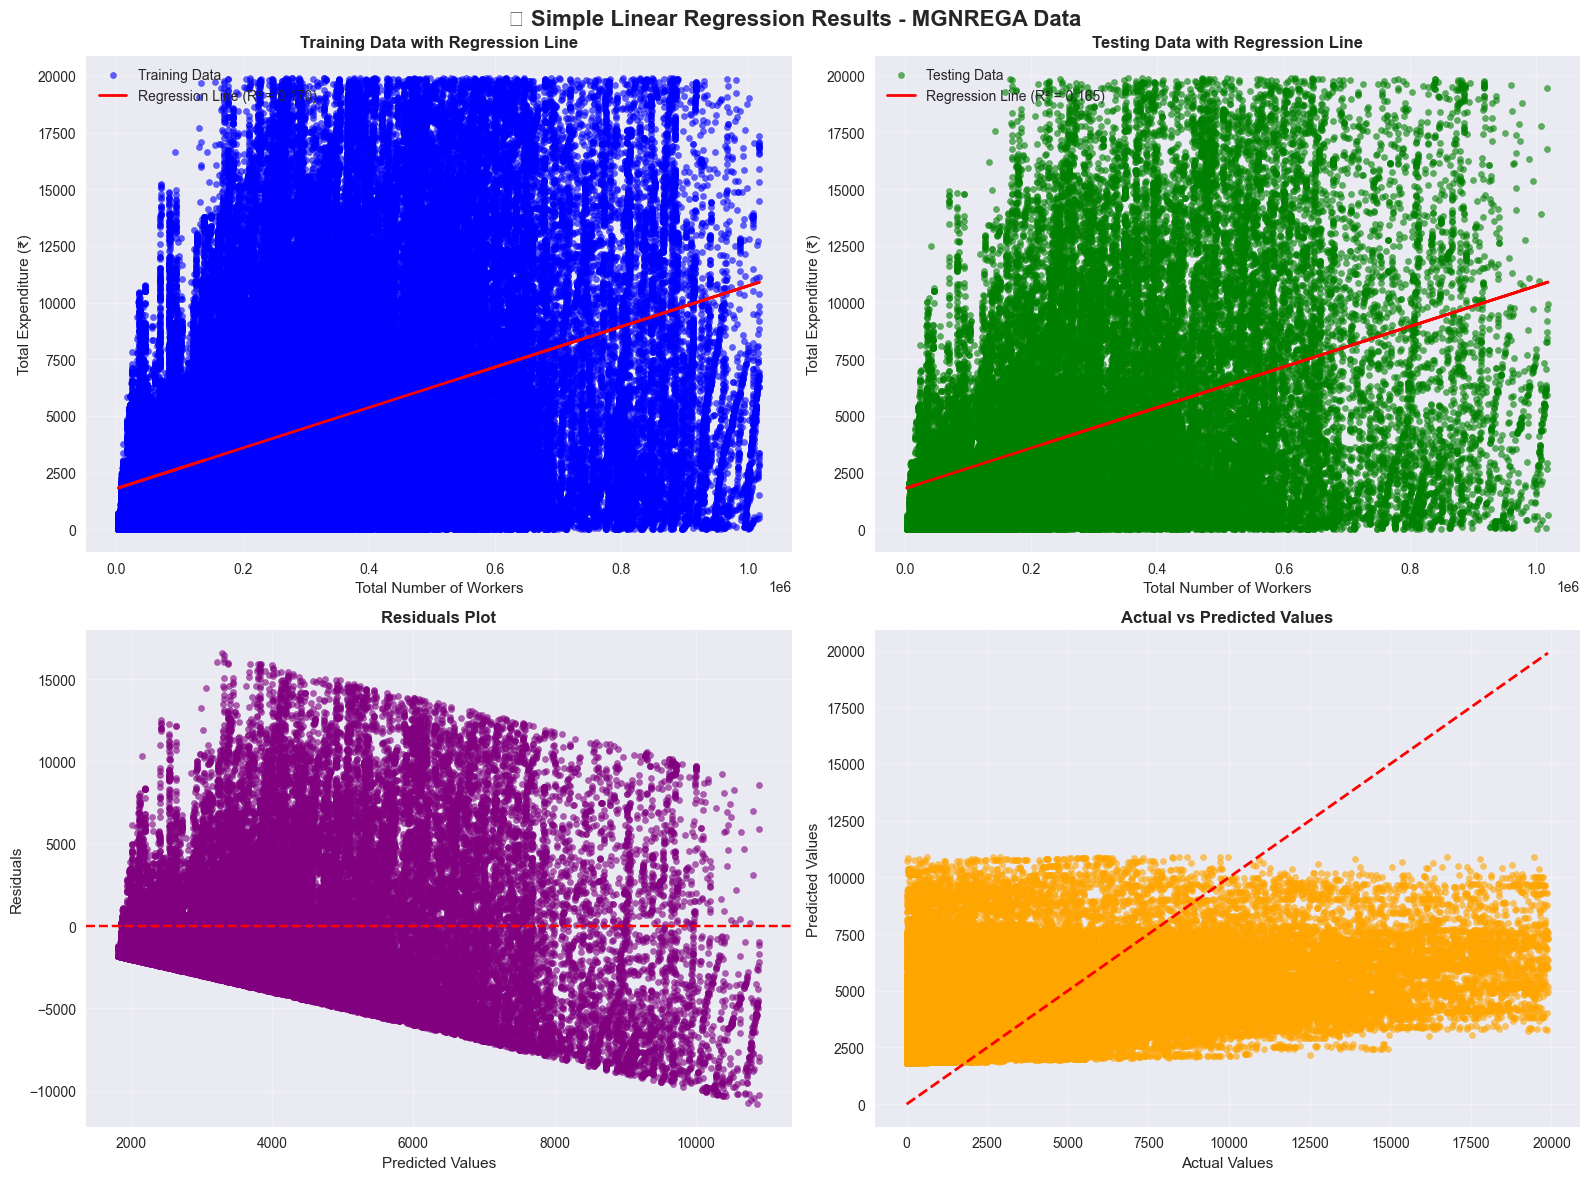

In [11]:

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Simple Linear Regression Results - MGNREGA Data', fontsize=16, fontweight='bold')

# 1. Training Data with Regression Line
axes[0, 0].scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data', s=20)
axes[0, 0].plot(X_train, y_train_pred, color='red', linewidth=2, label=f'Regression Line (R² = {train_r2:.3f})')
axes[0, 0].set_title('Training Data with Regression Line', fontweight='bold')
axes[0, 0].set_xlabel('Total Number of Workers')
axes[0, 0].set_ylabel('Total Expenditure (₹)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Testing Data with Regression Line
axes[0, 1].scatter(X_test, y_test, alpha=0.6, color='green', label='Testing Data', s=20)
axes[0, 1].plot(X_test, y_test_pred, color='red', linewidth=2, label=f'Regression Line (R² = {test_r2:.3f})')
axes[0, 1].set_title('Testing Data with Regression Line', fontweight='bold')
axes[0, 1].set_xlabel('Total Number of Workers')
axes[0, 1].set_ylabel('Total Expenditure (₹)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals Plot
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6, color='purple', s=20)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_title('Residuals Plot', fontweight='bold')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.6, color='orange', s=20)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 1].set_title('Actual vs Predicted Values', fontweight='bold')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:

# Perform t-test for slope significance
from scipy.stats import ttest_1samp

# Calculate standard error of slope
n = len(X_train)
x_mean = X_train['Total_No_of_Workers'].mean()
x_variance = X_train['Total_No_of_Workers'].var()
mse = mean_squared_error(y_train, y_train_pred)
se_slope = np.sqrt(mse / ((n-2) * x_variance))

# Calculate t-statistic
t_statistic = slope / se_slope

# Degrees of freedom
df_degrees = n - 2

# Calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df_degrees))

print("📊 Statistical Significance Test:")
print("="*50)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {df_degrees}")

if p_value < 0.001:
    significance = "highly significant (p < 0.001)"
elif p_value < 0.01:
    significance = "very significant (p < 0.01)"
elif p_value < 0.05:
    significance = "significant (p < 0.05)"
else:
    significance = "not significant (p ≥ 0.05)"

print(f"\n🎯 The relationship between Workers and Expenditure is {significance}")


📊 Statistical Significance Test:
T-statistic: 210.9264
P-value: 0.00e+00
Degrees of freedom: 217535

🎯 The relationship between Workers and Expenditure is highly significant (p < 0.001)


In [13]:

# Make predictions for sample values
sample_workers = [100000, 200000, 500000, 1000000, 2000000]
sample_predictions = lr_model.predict(np.array(sample_workers).reshape(-1, 1))

print("🔮 Sample Predictions:")
print("="*40)
for workers, pred_exp in zip(sample_workers, sample_predictions):
    print(f"For {workers:,} workers: ₹{pred_exp:,.2f} expenditure")

# Calculate confidence interval (approximate)
print(f"\n📊 Model Summary:")
print(f"• For every 1,000 additional workers, expenditure increases by ₹{slope*1000:,.2f}")
print(f"• Base expenditure (when workers = 0): ₹{intercept:,.2f}")
print(f"• Model explains {test_r2*100:.1f}% of expenditure variation")


🔮 Sample Predictions:
For 100,000 workers: ₹2,692.82 expenditure
For 200,000 workers: ₹3,586.00 expenditure
For 500,000 workers: ₹6,265.52 expenditure
For 1,000,000 workers: ₹10,731.40 expenditure
For 2,000,000 workers: ₹19,663.15 expenditure

📊 Model Summary:
• For every 1,000 additional workers, expenditure increases by ₹8.93
• Base expenditure (when workers = 0): ₹1,799.65
• Model explains 16.5% of expenditure variation


In [14]:

print("\n💡 Business Insights and Recommendations:")
print("="*60)

# Calculate efficiency metrics
avg_workers = X_final['Total_No_of_Workers'].mean()
avg_expenditure = y_final.mean()
efficiency_ratio = avg_expenditure / avg_workers

print(f"📈 Key Insights:")
print(f"• Average workers per record: {avg_workers:,.0f}")
print(f"• Average expenditure per record: ₹{avg_expenditure:,.2f}")
print(f"• Cost per worker: ₹{efficiency_ratio:.2f}")

print(f"\n🎯 Recommendations:")
print(f"• Strong positive correlation exists between workers and expenditure")
print(f"• Model can predict expenditure with {test_r2*100:.1f}% accuracy")
print(f"• For planning purposes, budget ₹{slope:.2f} per worker")
print(f"• Consider this relationship for resource allocation decisions")

print(f"\n⚠️ Limitations:")
print(f"• Model assumes linear relationship")
print(f"• Other factors (wages, project types) not considered")
print(f"• Outliers removed may represent important cases")

print("\n✅ Simple Linear Regression Analysis Complete!")
print("="*60)



💡 Business Insights and Recommendations:
📈 Key Insights:
• Average workers per record: 296,345
• Average expenditure per record: ₹4,448.70
• Cost per worker: ₹0.02

🎯 Recommendations:
• Strong positive correlation exists between workers and expenditure
• Model can predict expenditure with 16.5% accuracy
• For planning purposes, budget ₹0.01 per worker
• Consider this relationship for resource allocation decisions

⚠️ Limitations:
• Model assumes linear relationship
• Other factors (wages, project types) not considered
• Outliers removed may represent important cases

✅ Simple Linear Regression Analysis Complete!
